Universidad Galileo  
Maestría en Data Science  
Statistical Learning I
Sección U  


   # **Proyecto final: Clasificación binaria**


<p style="text-align: right;">
Henry Giovanni<br/>
Barrientos García<br/>
21001538<br/>
Guatemala, 02 de julio de 2022<br/>
</p>

In [3]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import tensorflow as tf
from joblib import load
import scipy.stats as stats
from scipy.stats import norm
from scipy.stats import mode
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [4]:
# Cargamos los mejores modelos obtenidos en el proceso de validación y entrenamiento
tree = load("models/modelDecisionTreeClassifier(max_depth=3).joblib")
svm = load("models/modelSVM(C=2,kernel=rbf).joblib")
nb = load("models/modelNaiveBayes(sinVariable=EmbarkedS).joblib")
lr = load("models/modelLogisticRegression(lr=0.01,regularization=lasso,epochs=1000,bachSize=32).joblib")

In [6]:
# Datos para pruebas
xTest = load("data/xTest.joblib")
xTest = xTest.drop(columns=['passenger_survived','survivedP'])
yTest = load("data/yTest.joblib")

Probabilidad = load("data/Probabilidad.joblib")
Probabilidad0 = Probabilidad[0]
Probabilidad1 = Probabilidad[1]

In [7]:
xTest

,Age,SibSp,Parch,Fare,passenger_sex,LClass,MClass,UClass,EmbarkedC,EmbarkedQ,EmbarkedS
461,0.973097,0.0,0.000000,0.230395,1,1.0,0.0,0.0,0.0,0.0,1.0
624,0.793606,0.0,0.000000,0.608432,1,1.0,0.0,0.0,0.0,0.0,1.0
731,0.505263,0.0,0.000000,0.862966,1,1.0,0.0,0.0,1.0,0.0,0.0
281,0.962837,0.0,0.000000,0.270083,1,1.0,0.0,0.0,0.0,0.0,1.0
659,0.455702,0.0,0.015714,0.889994,1,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
784,0.962463,0.0,0.000000,0.271414,1,1.0,0.0,0.0,0.0,0.0,1.0
422,0.965051,0.0,0.000000,0.262061,1,1.0,0.0,0.0,0.0,0.0,1.0
527,0.125257,0.0,0.000000,0.992124,1,0.0,0.0,1.0,0.0,0.0,1.0
325,0.256539,0.0,0.000000,0.966534,0,0.0,0.0,1.0,1.0,0.0,0.0


In [8]:
yTest

461    0
624    0
731    0
281    0
659    0
      ..
784    0
422    0
527    0
325    1
651    1
Name: passenger_survived, Length: 179, dtype: int64

## Función para predecir

In [9]:
def predecir(i):
    x = np.array(xTest.iloc[i]).reshape(1,-1)
    y = yTest.iloc[i]
    prediction_tree = int(tree.predict(x))
    prediction_svm = int(svm.predict(x))
    
    
    # Naive Bayes
    temp0 = []
    temp1 = []
    medidas0 = nb['nb0']
    medidas1 = nb['nb1']
    prob0 = Probabilidad0
    prob1 = Probabilidad1

    for i in range(0, medidas0.shape[0]):
        predictions0 = norm(medidas0[i][0], medidas0[i][1]).cdf(x[0][i])
        predictions1 = norm(medidas1[i][0], medidas1[i][1]).cdf(x[0][i])
        temp0.append(predictions0)
        temp1.append(predictions1)

    x0prob = np.array(temp0).T.squeeze()
    x1prob = np.array(temp1).T.squeeze()
    x0 = np.append(x0prob, prob0)
    x1 = np.append(x1prob, prob1)
    y0 = np.prod(x0)
    y1 = np.prod(x1)
    y01 = np.append(y0,y1)
    prediction_nb = np.argmax(y01)

    
    # Regresion logistica
    x_lr = np.append(1,x)
    logit = np.dot(x_lr, lr.squeeze())
    lr_probability =  1/(1 + np.exp(-logit))
    prediction_lr = int(round(lr_probability))
    
    # Predicciones totales
    predictions = [prediction_tree,prediction_svm, prediction_lr, prediction_nb]
    prediction = int(mode(predictions)[0])
    
    #Etiquetas
    labels = {0:"died", 1:"survived"}
    
    print("---------Resumen de resultados--------------")
    print("Valor real:", labels.get(y))
    print("Predicción:", labels.get(prediction))
    print("Probabilida (Regresión Logística):", lr_probability)
    print("Probabilidad Naive Bayes 0:", y0)
    print("Probabilidad Naive Bayes 0:", y1)
    print("Árbol de decisiones (Grafo)")
    fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi=500)
    plot_tree(tree, feature_names = list(xTest.columns), filled = True, proportion = True)
   
    return prediction

## Prueba con distinta cantidad de observaciones

---------Resumen de resultados--------------
Valor real: died
Predicción: died
Probabilida (Regresión Logística): 0.08118839541871366
Probabilidad Naive Bayes 0: 0.00010713463479137036
Probabilidad Naive Bayes 0: 1.9884923143186162e-05
Árbol de decisiones (Grafo)


0

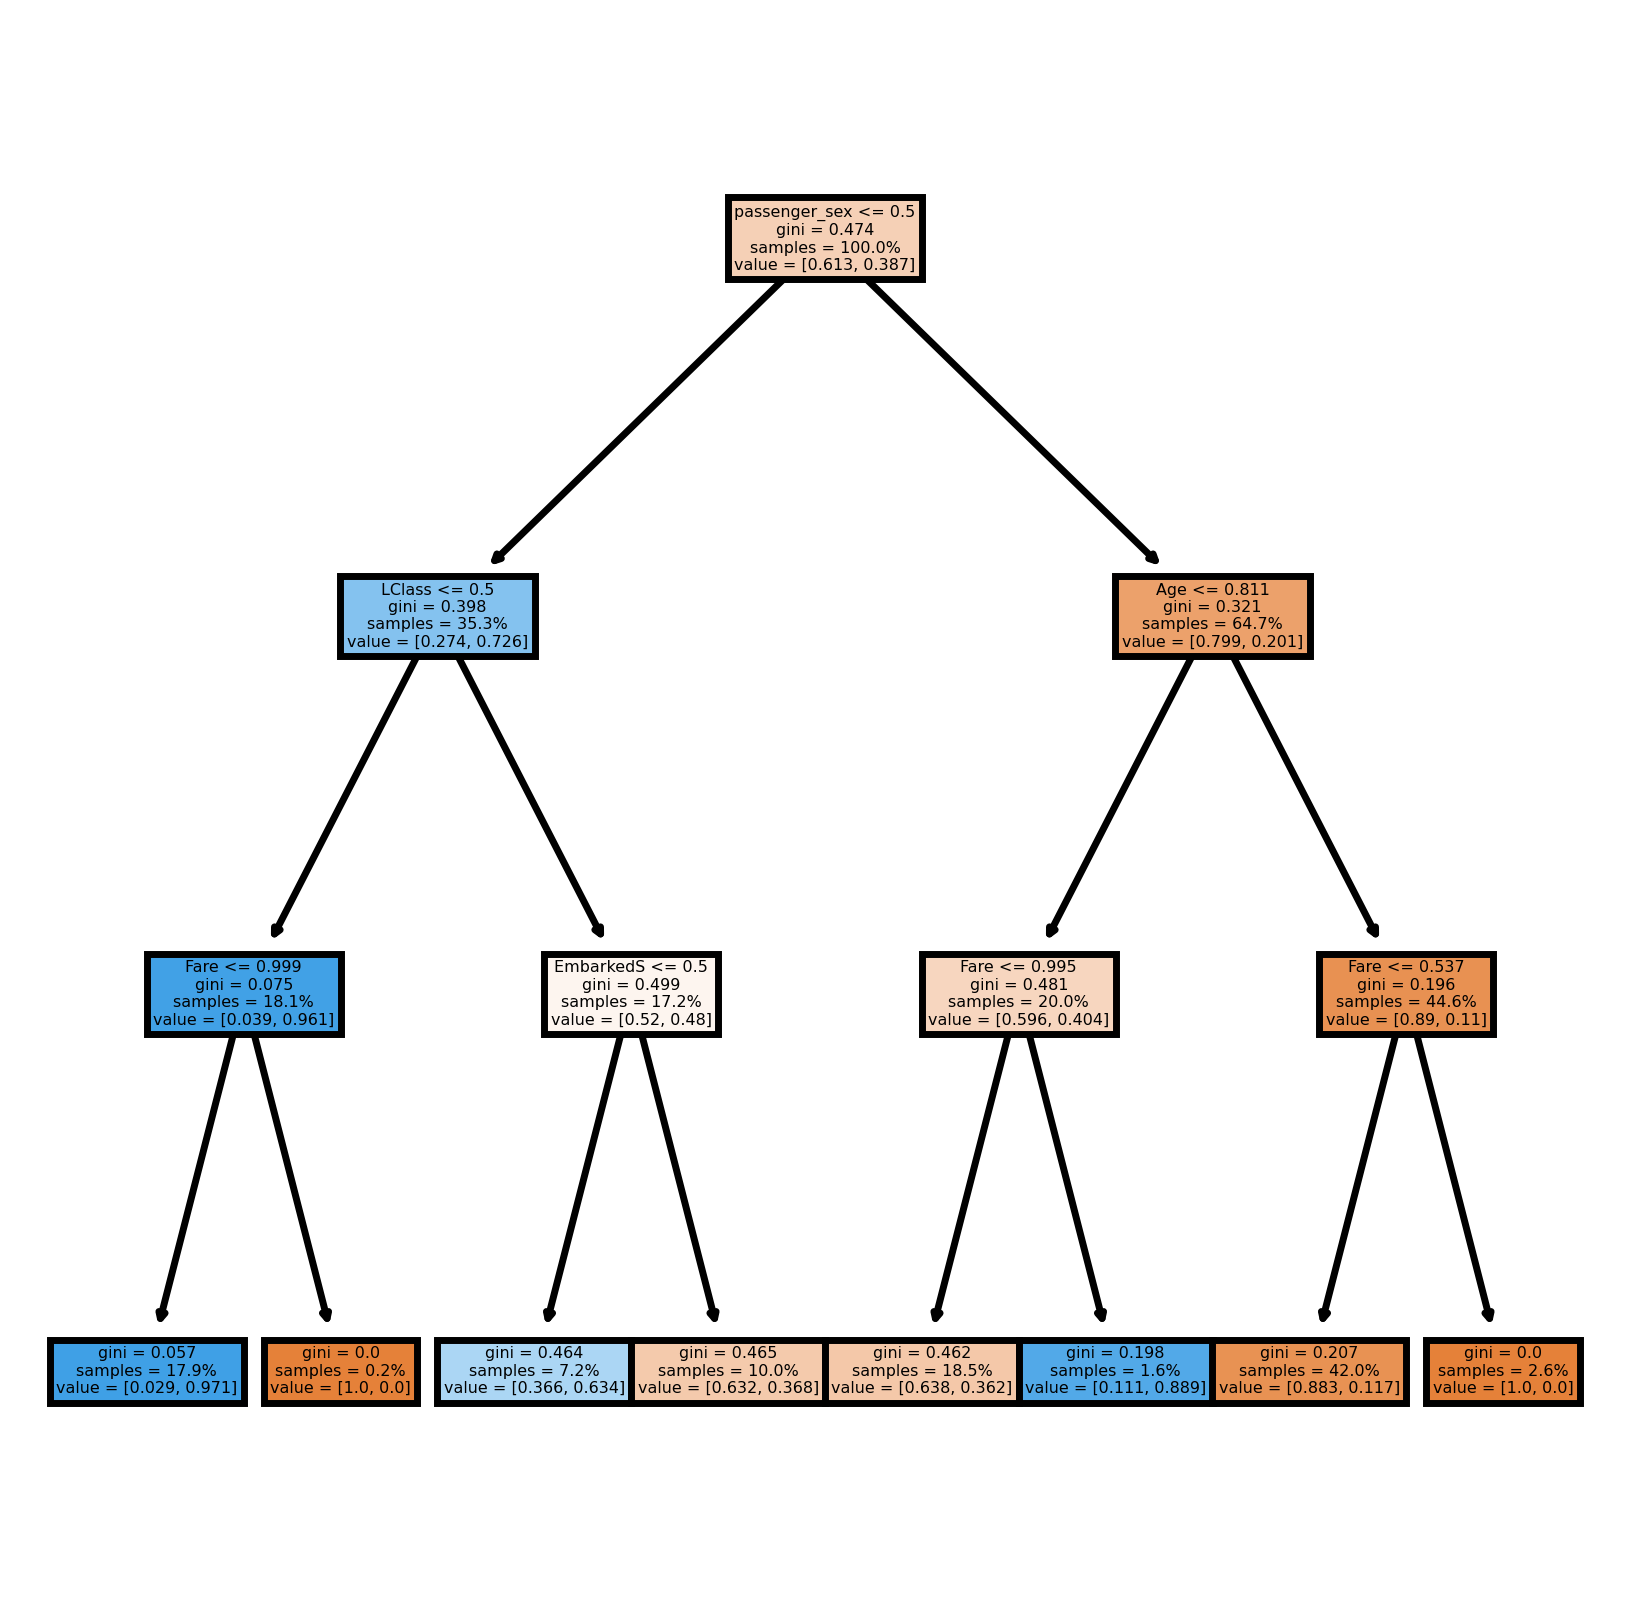

In [10]:
predecir(35)

---------Resumen de resultados--------------
Valor real: died
Predicción: died
Probabilida (Regresión Logística): 0.07290933202468172
Probabilidad Naive Bayes 0: 6.336725202095463e-05
Probabilidad Naive Bayes 0: 9.629346404073182e-06
Árbol de decisiones (Grafo)


0

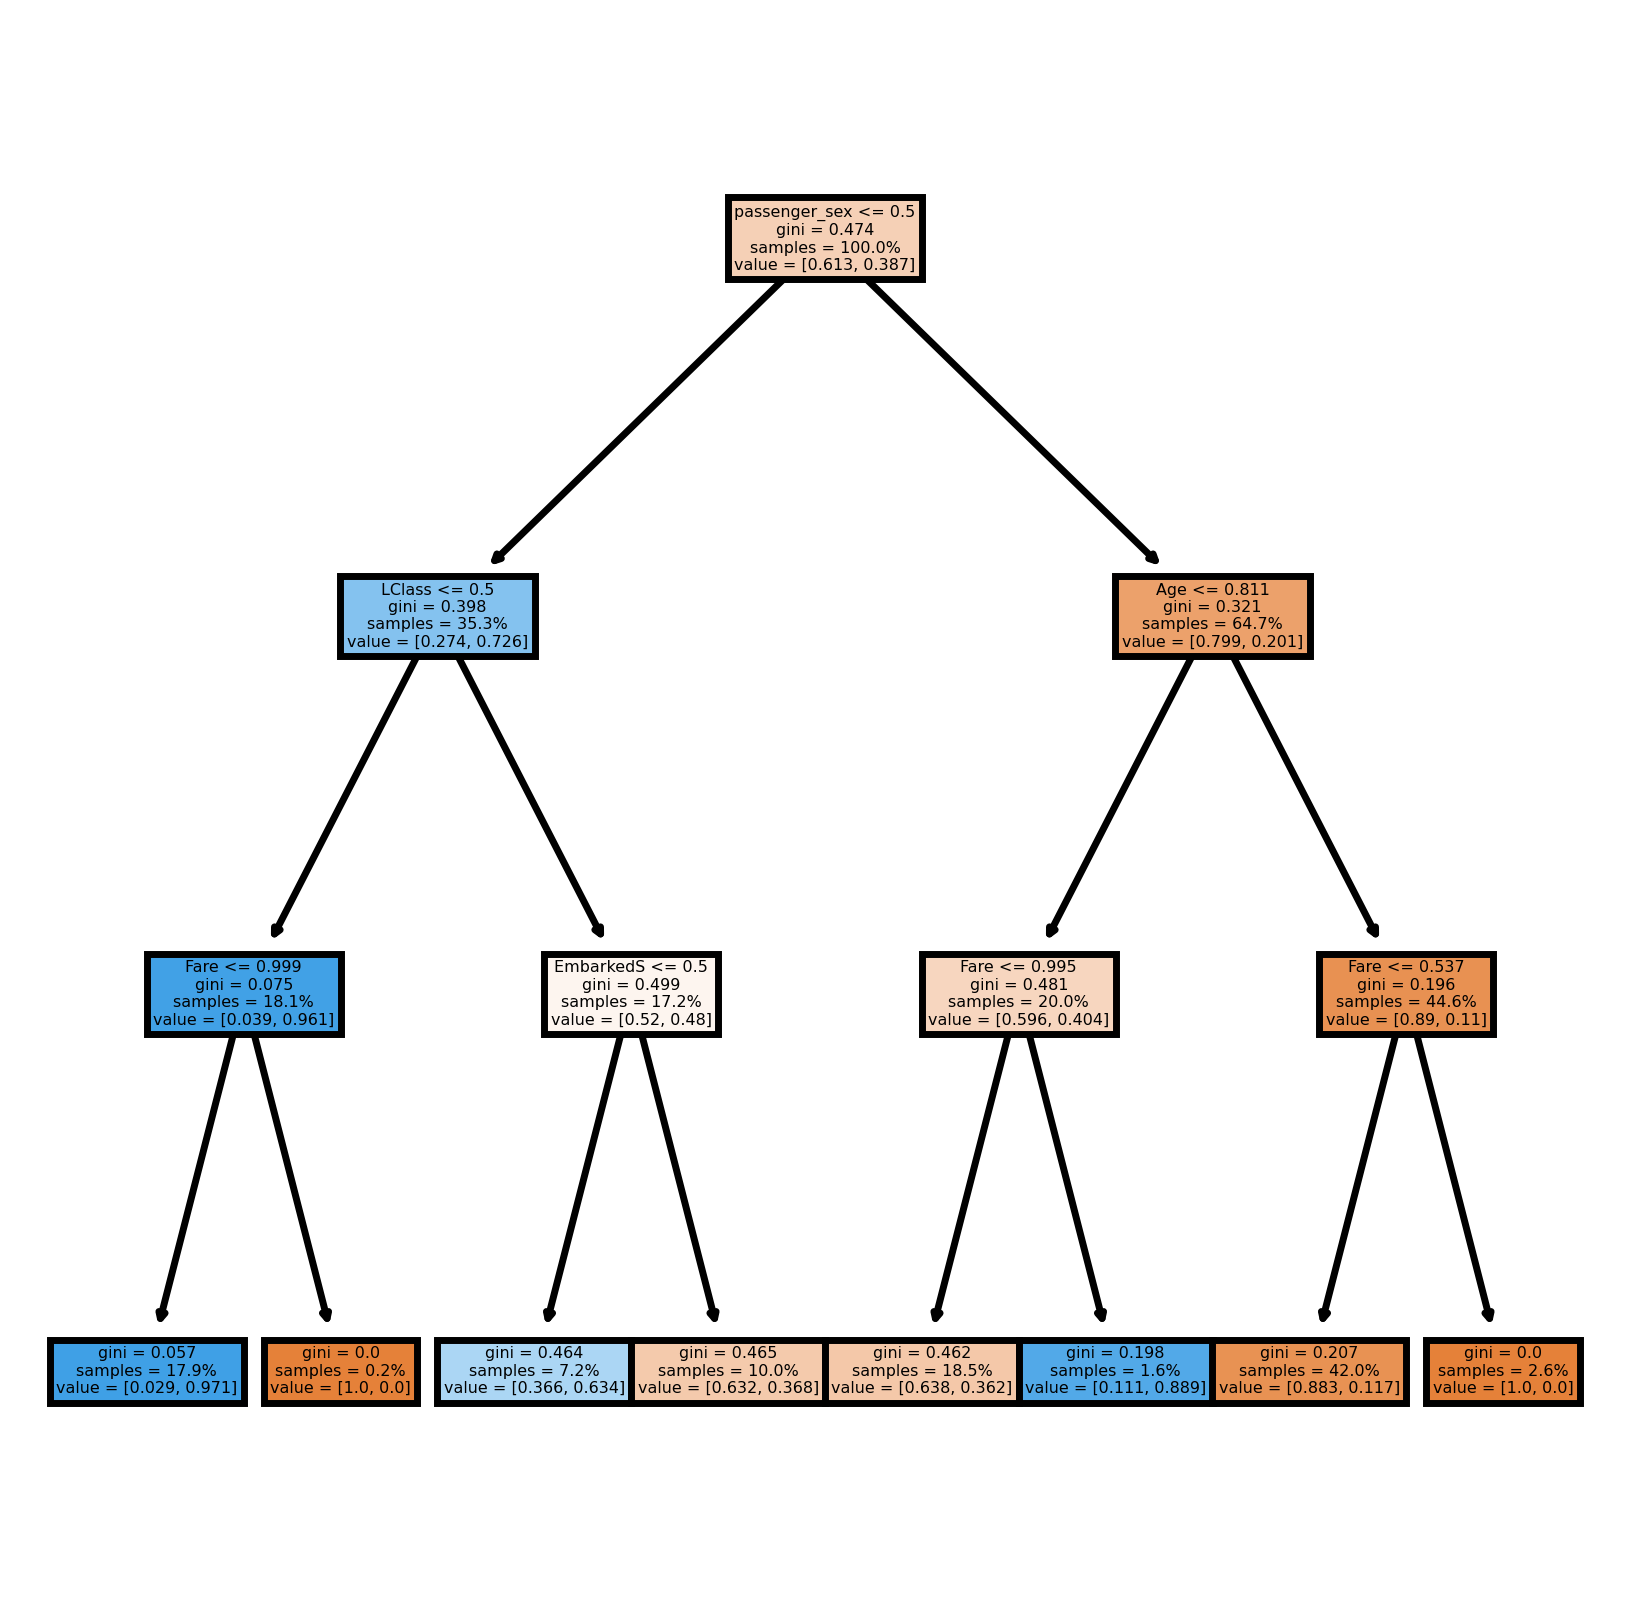

In [11]:
predecir(0)

---------Resumen de resultados--------------
Valor real: died
Predicción: died
Probabilida (Regresión Logística): 0.1065253259427801
Probabilidad Naive Bayes 0: 0.00016216845581023978
Probabilidad Naive Bayes 0: 5.709672174832223e-05
Árbol de decisiones (Grafo)


0

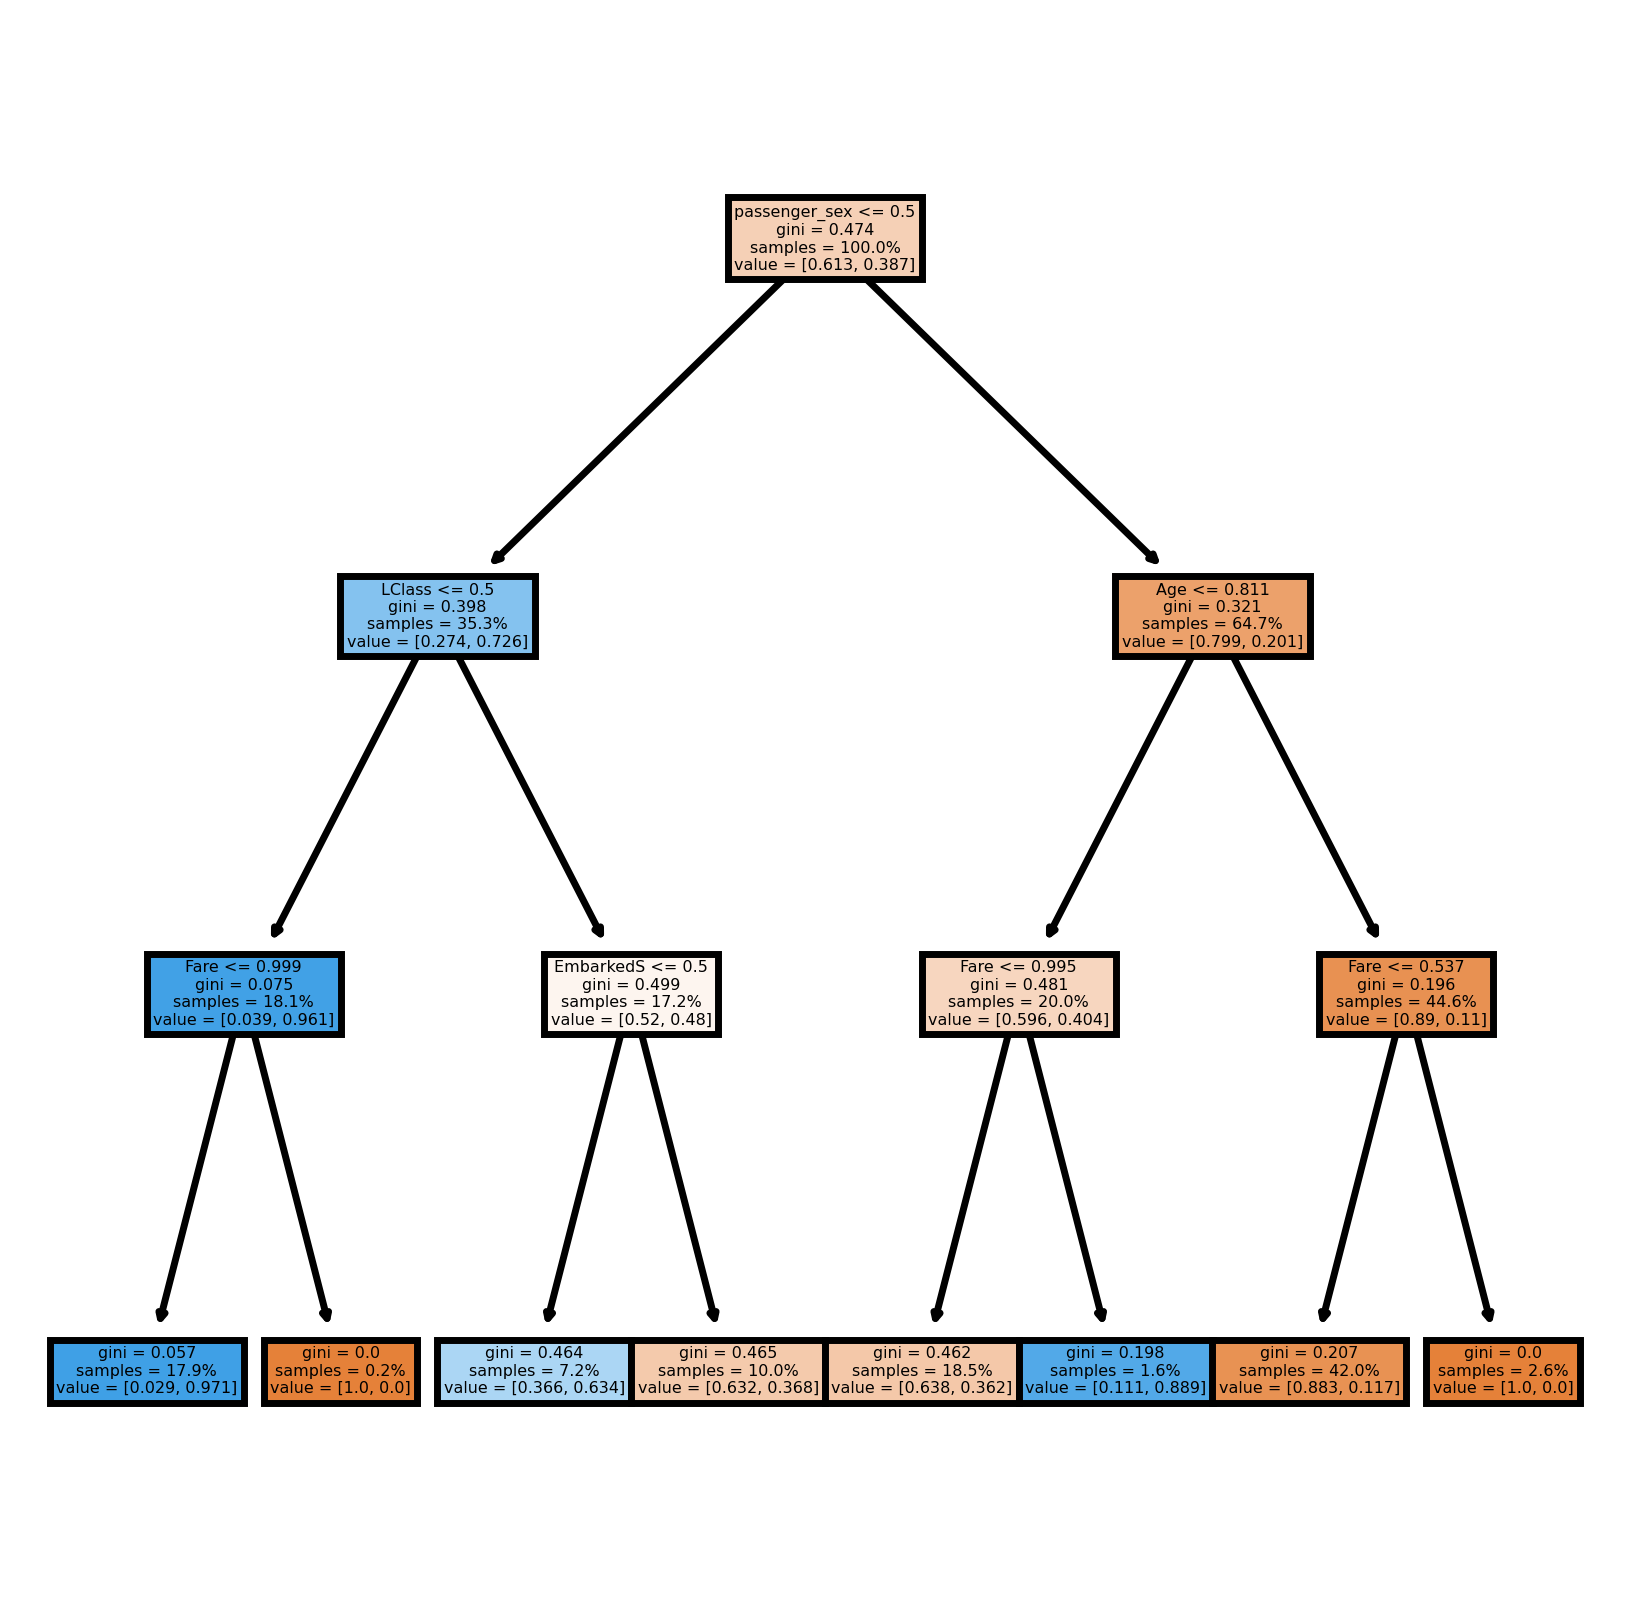

In [12]:
predecir(1)

---------Resumen de resultados--------------
Valor real: survived
Predicción: died
Probabilida (Regresión Logística): 0.43166794024395555
Probabilidad Naive Bayes 0: 3.3588736493499636e-07
Probabilidad Naive Bayes 0: 2.7224946537626726e-05
Árbol de decisiones (Grafo)


0

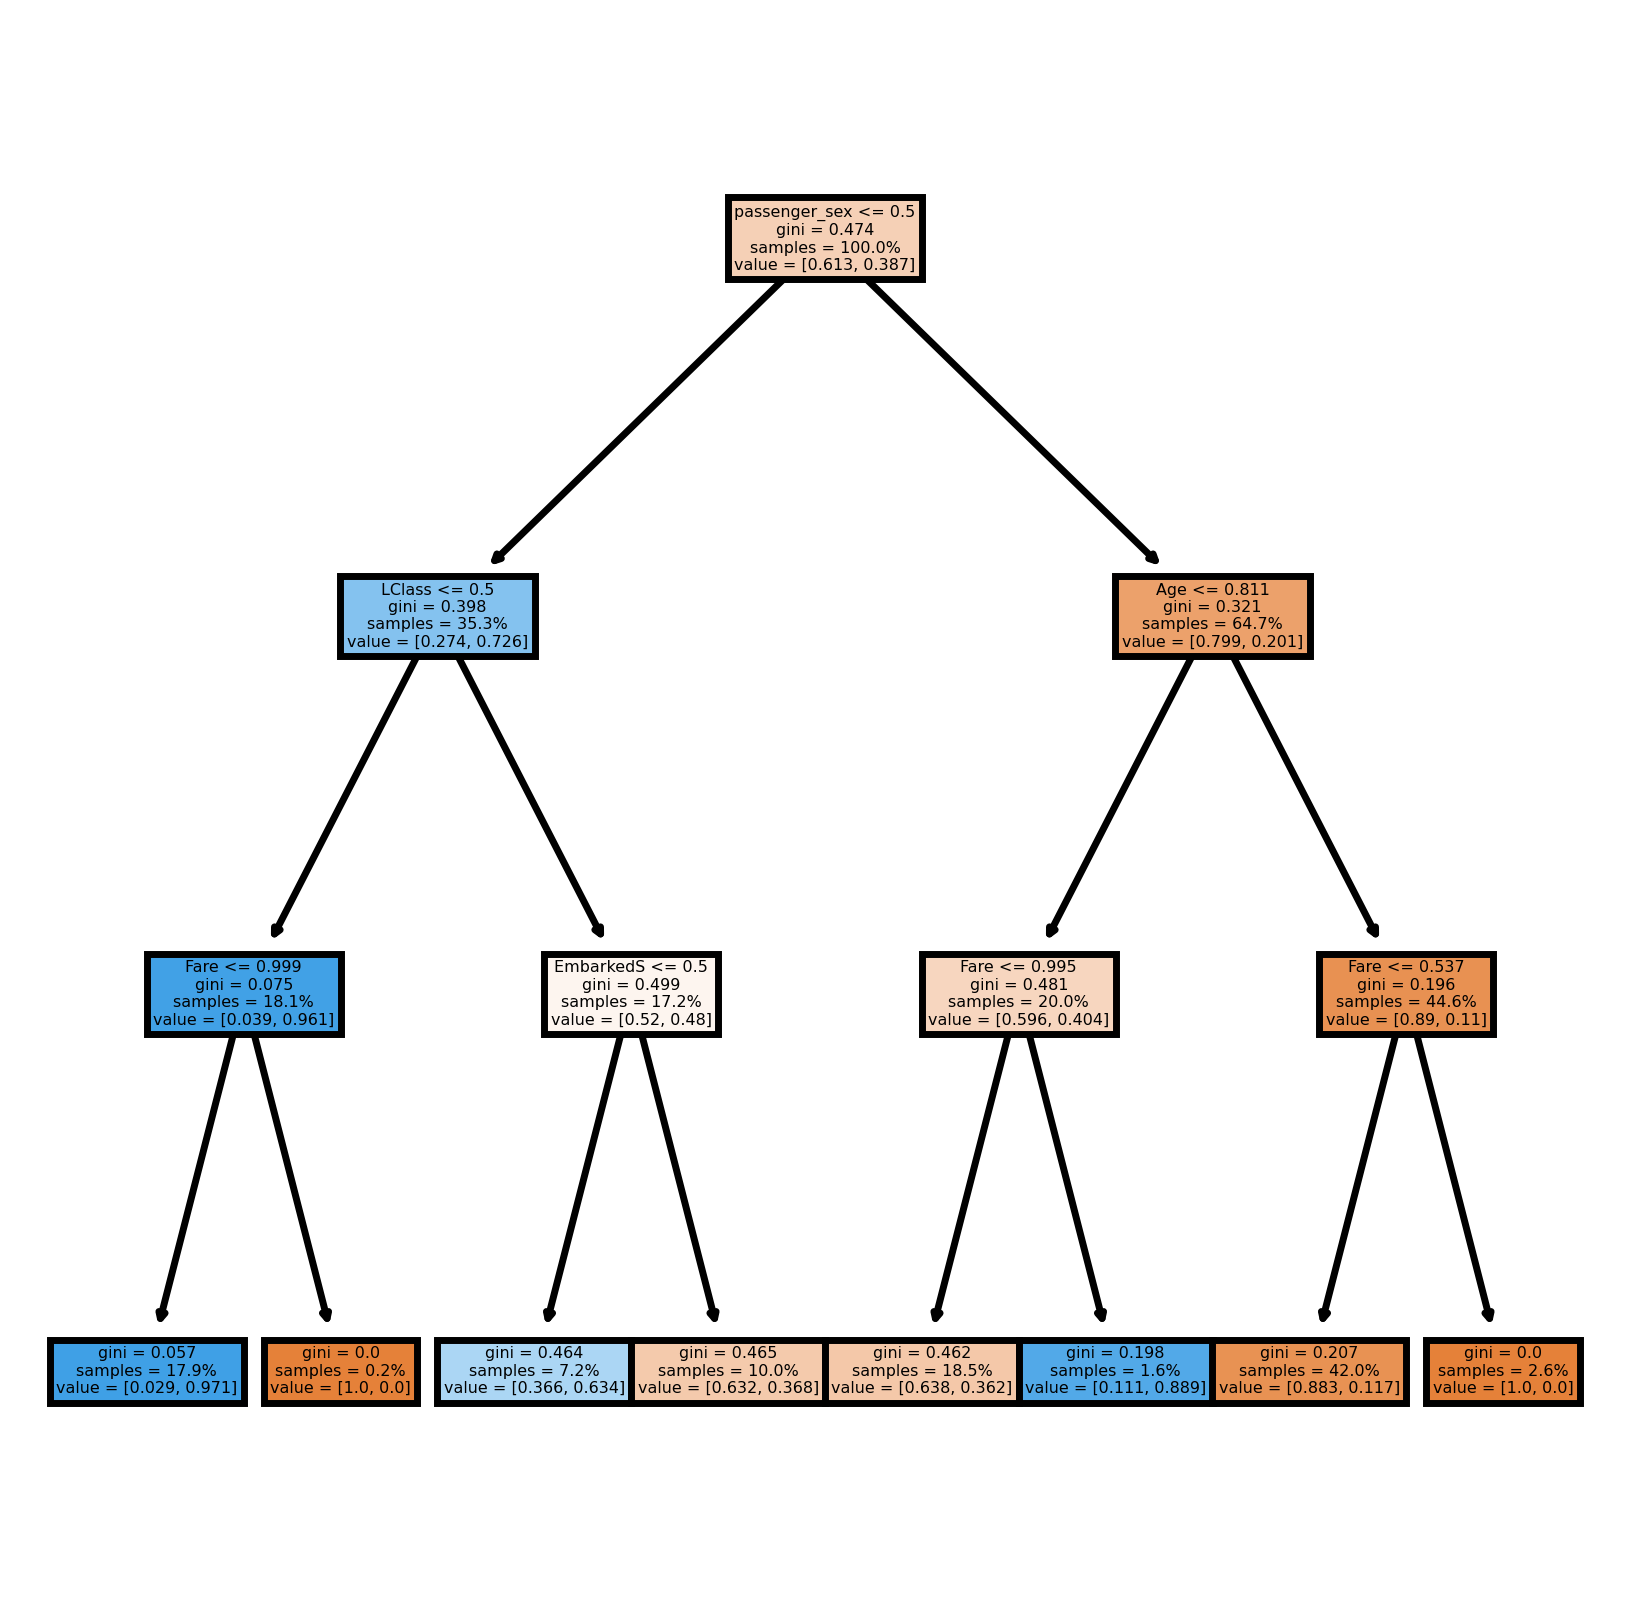

In [13]:
predecir(20)

---------Resumen de resultados--------------
Valor real: died
Predicción: died
Probabilida (Regresión Logística): 0.17693933741384033
Probabilidad Naive Bayes 0: 8.237725282800282e-06
Probabilidad Naive Bayes 0: 0.00010658391078799341
Árbol de decisiones (Grafo)


0

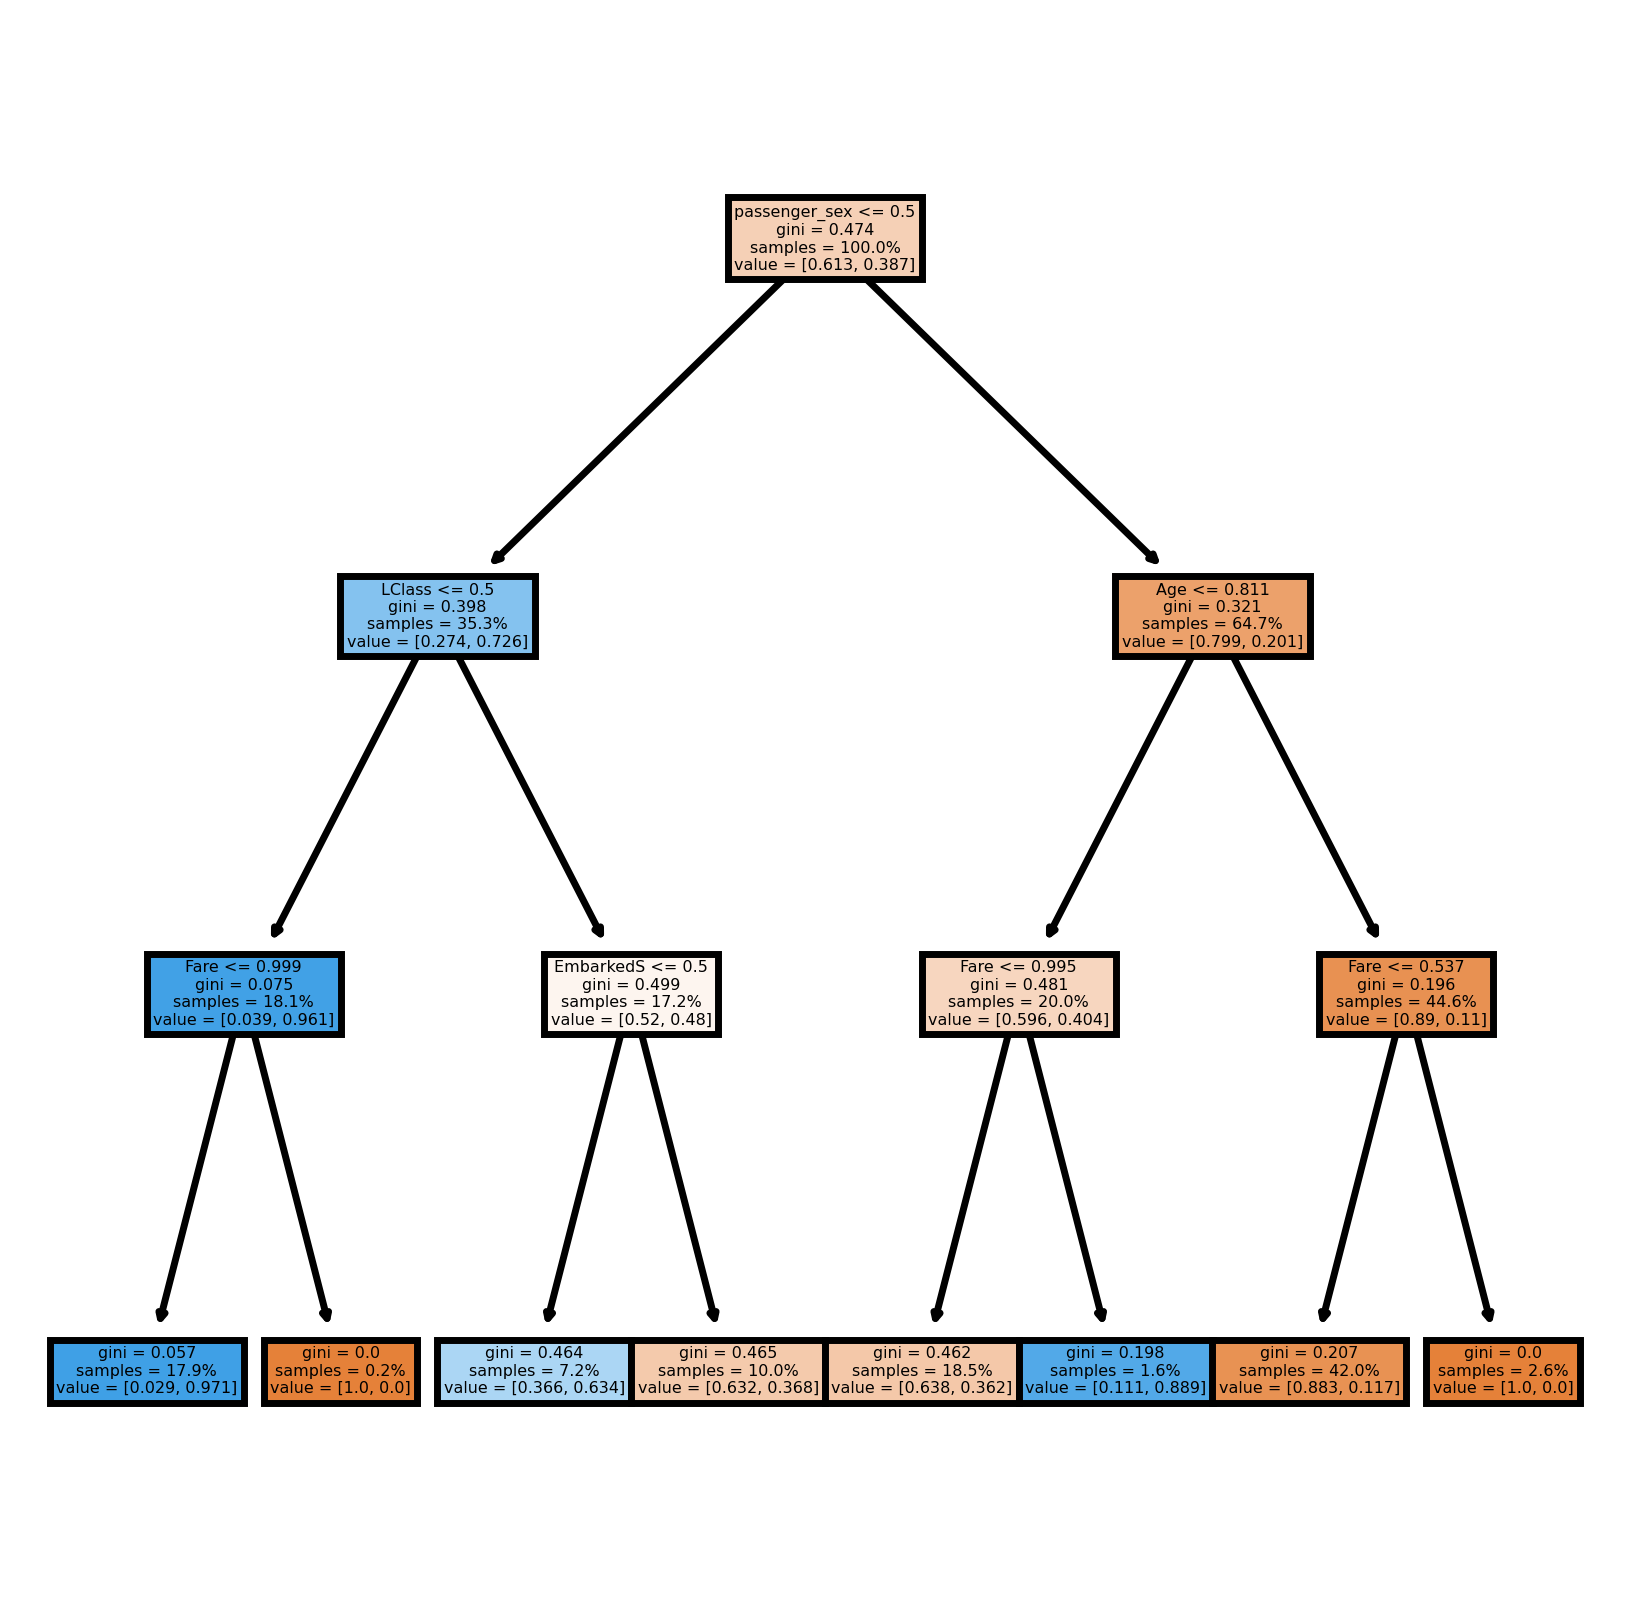

In [14]:
predecir(30)

---------Resumen de resultados--------------
Valor real: survived
Predicción: survived
Probabilida (Regresión Logística): 0.9010614567155986
Probabilidad Naive Bayes 0: 6.415794859165149e-07
Probabilidad Naive Bayes 0: 7.20728696059307e-05
Árbol de decisiones (Grafo)


1

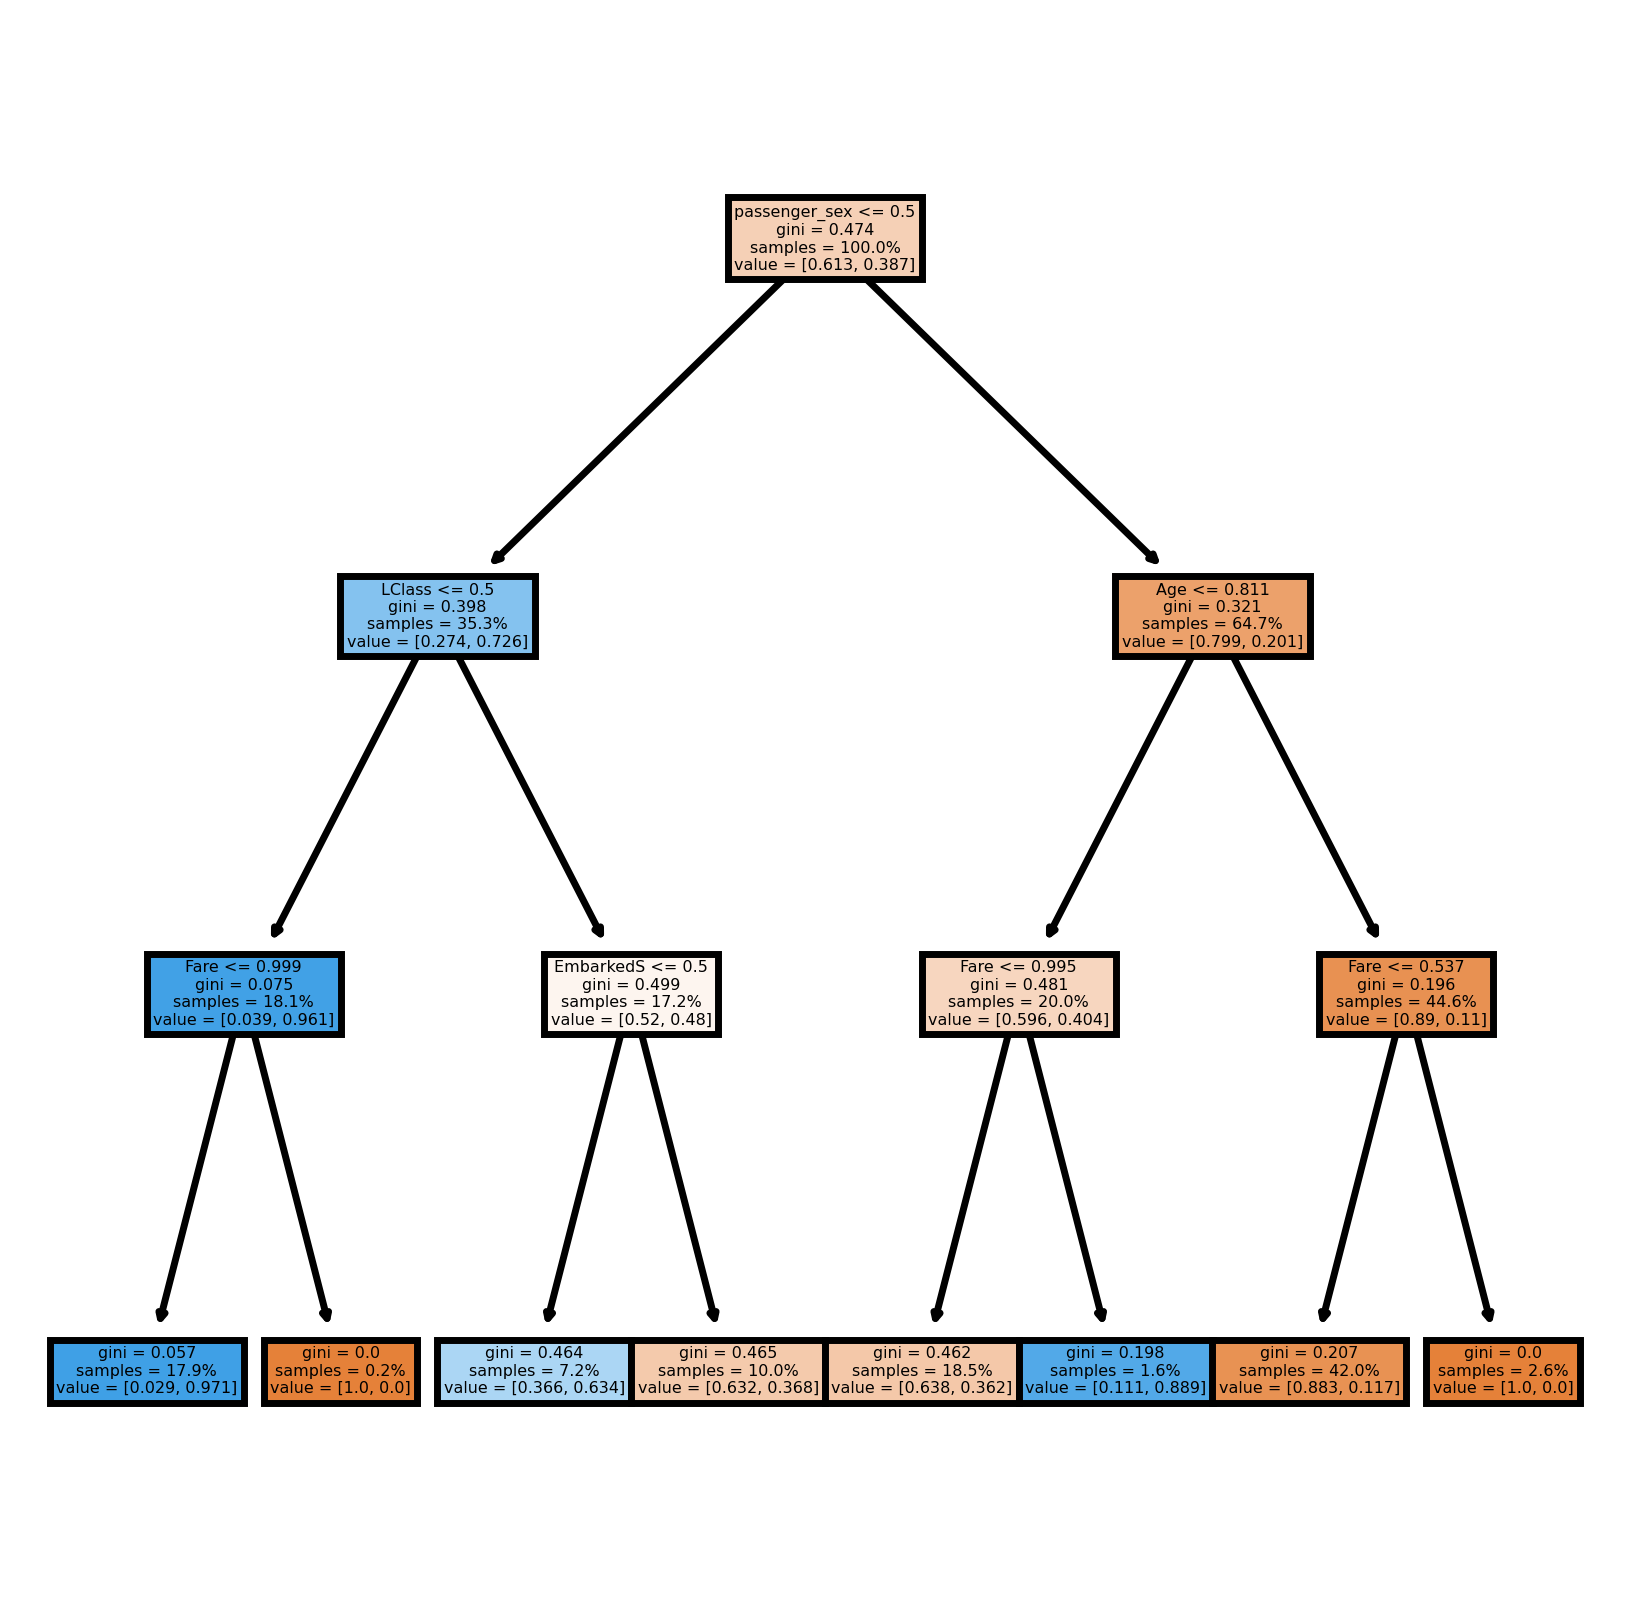

In [15]:
predecir(100)

---------Resumen de resultados--------------
Valor real: died
Predicción: survived
Probabilida (Regresión Logística): 0.5829106763171243
Probabilidad Naive Bayes 0: 4.98399177056517e-07
Probabilidad Naive Bayes 0: 3.240567009277269e-05
Árbol de decisiones (Grafo)


1

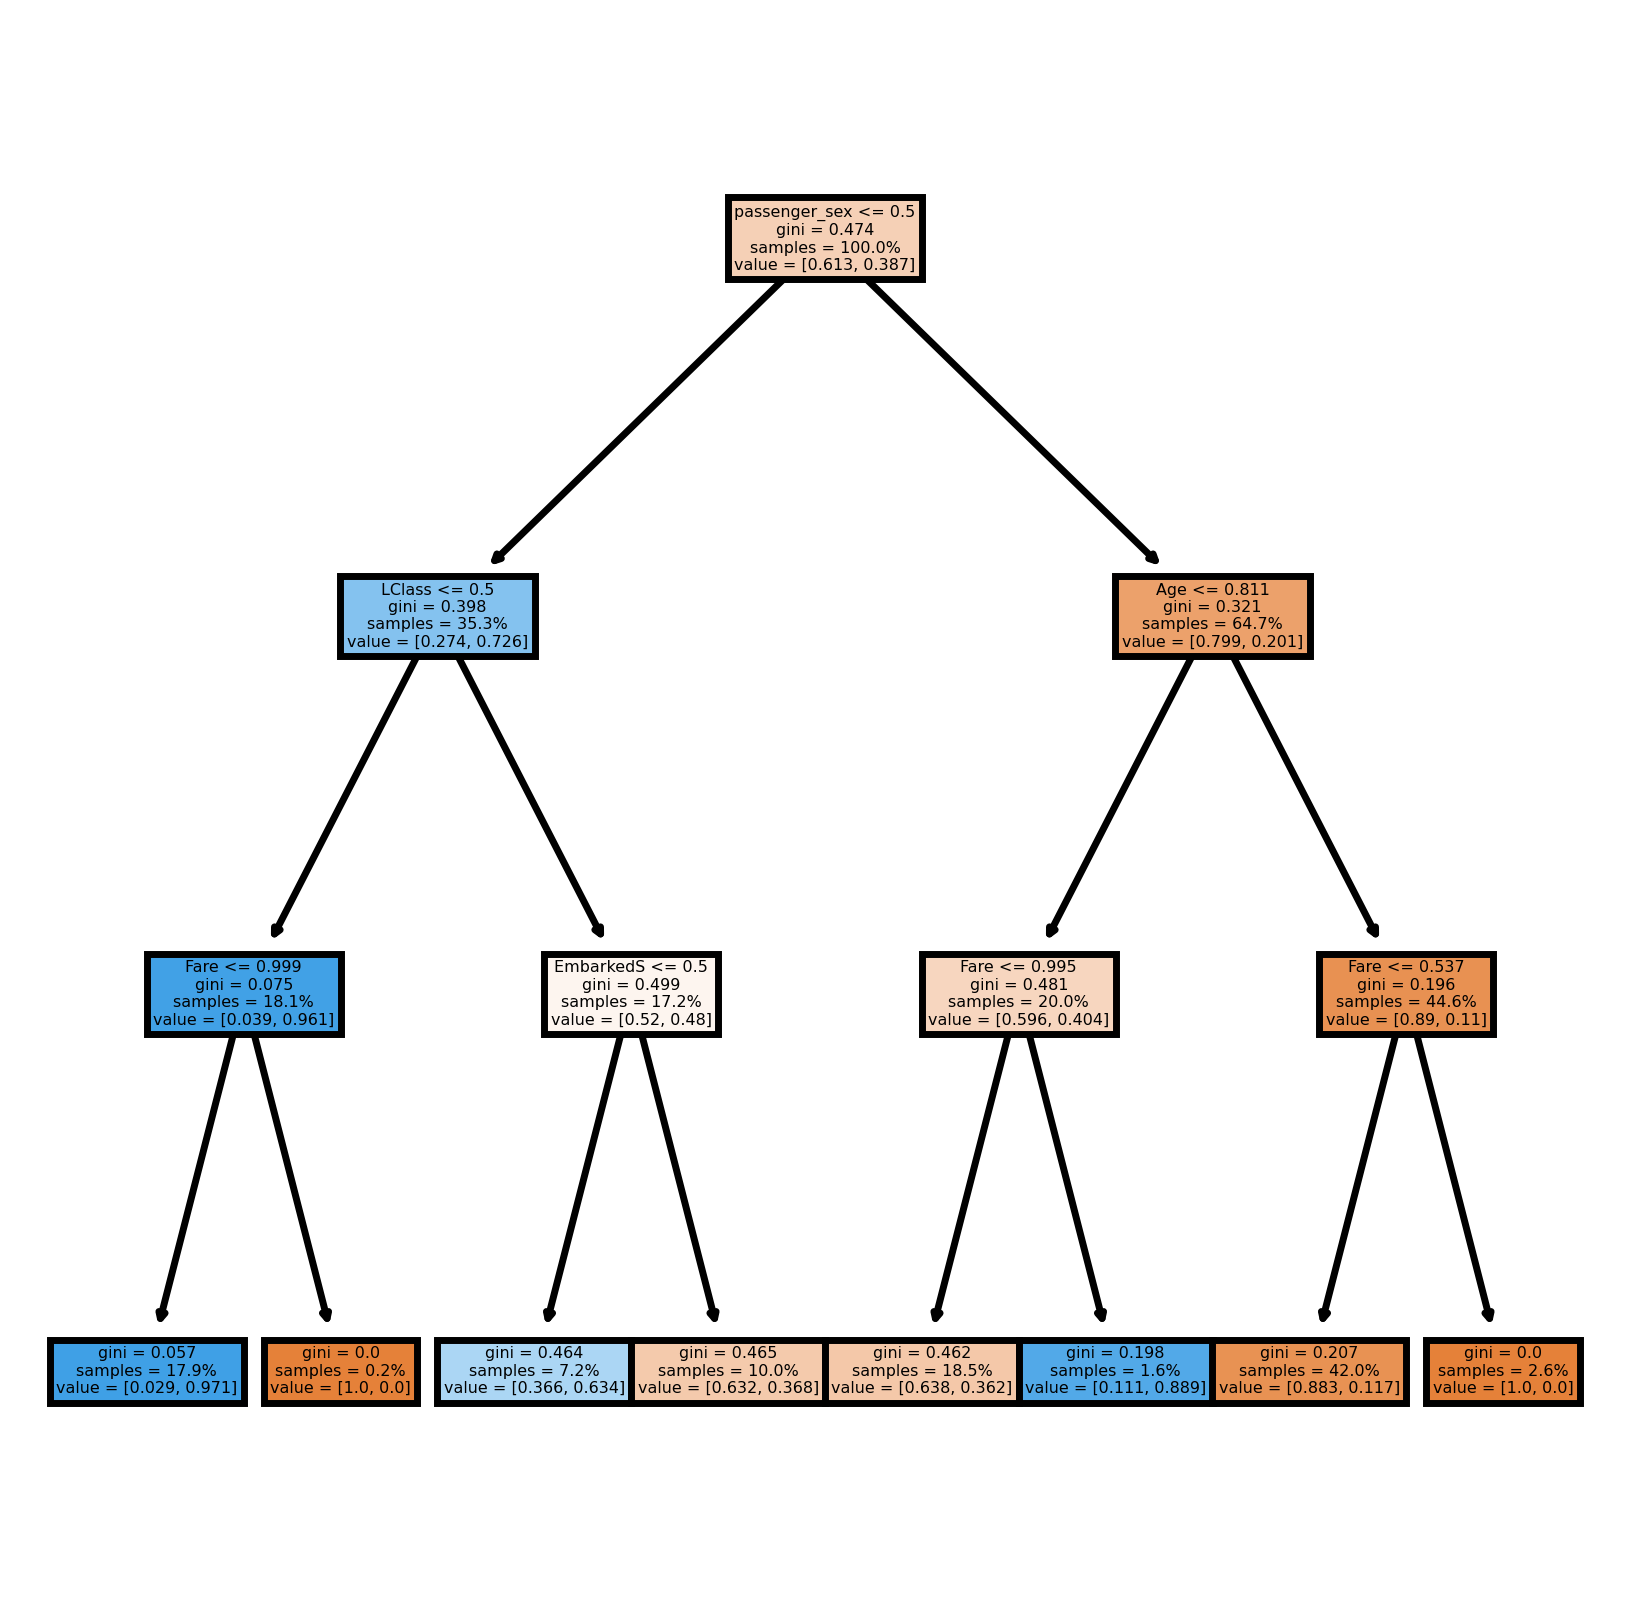

In [16]:
predecir(123)

---------Resumen de resultados--------------
Valor real: died
Predicción: died
Probabilida (Regresión Logística): 0.3641242447508424
Probabilidad Naive Bayes 0: 3.643365503990987e-05
Probabilidad Naive Bayes 0: 6.708639853296902e-05
Árbol de decisiones (Grafo)


0

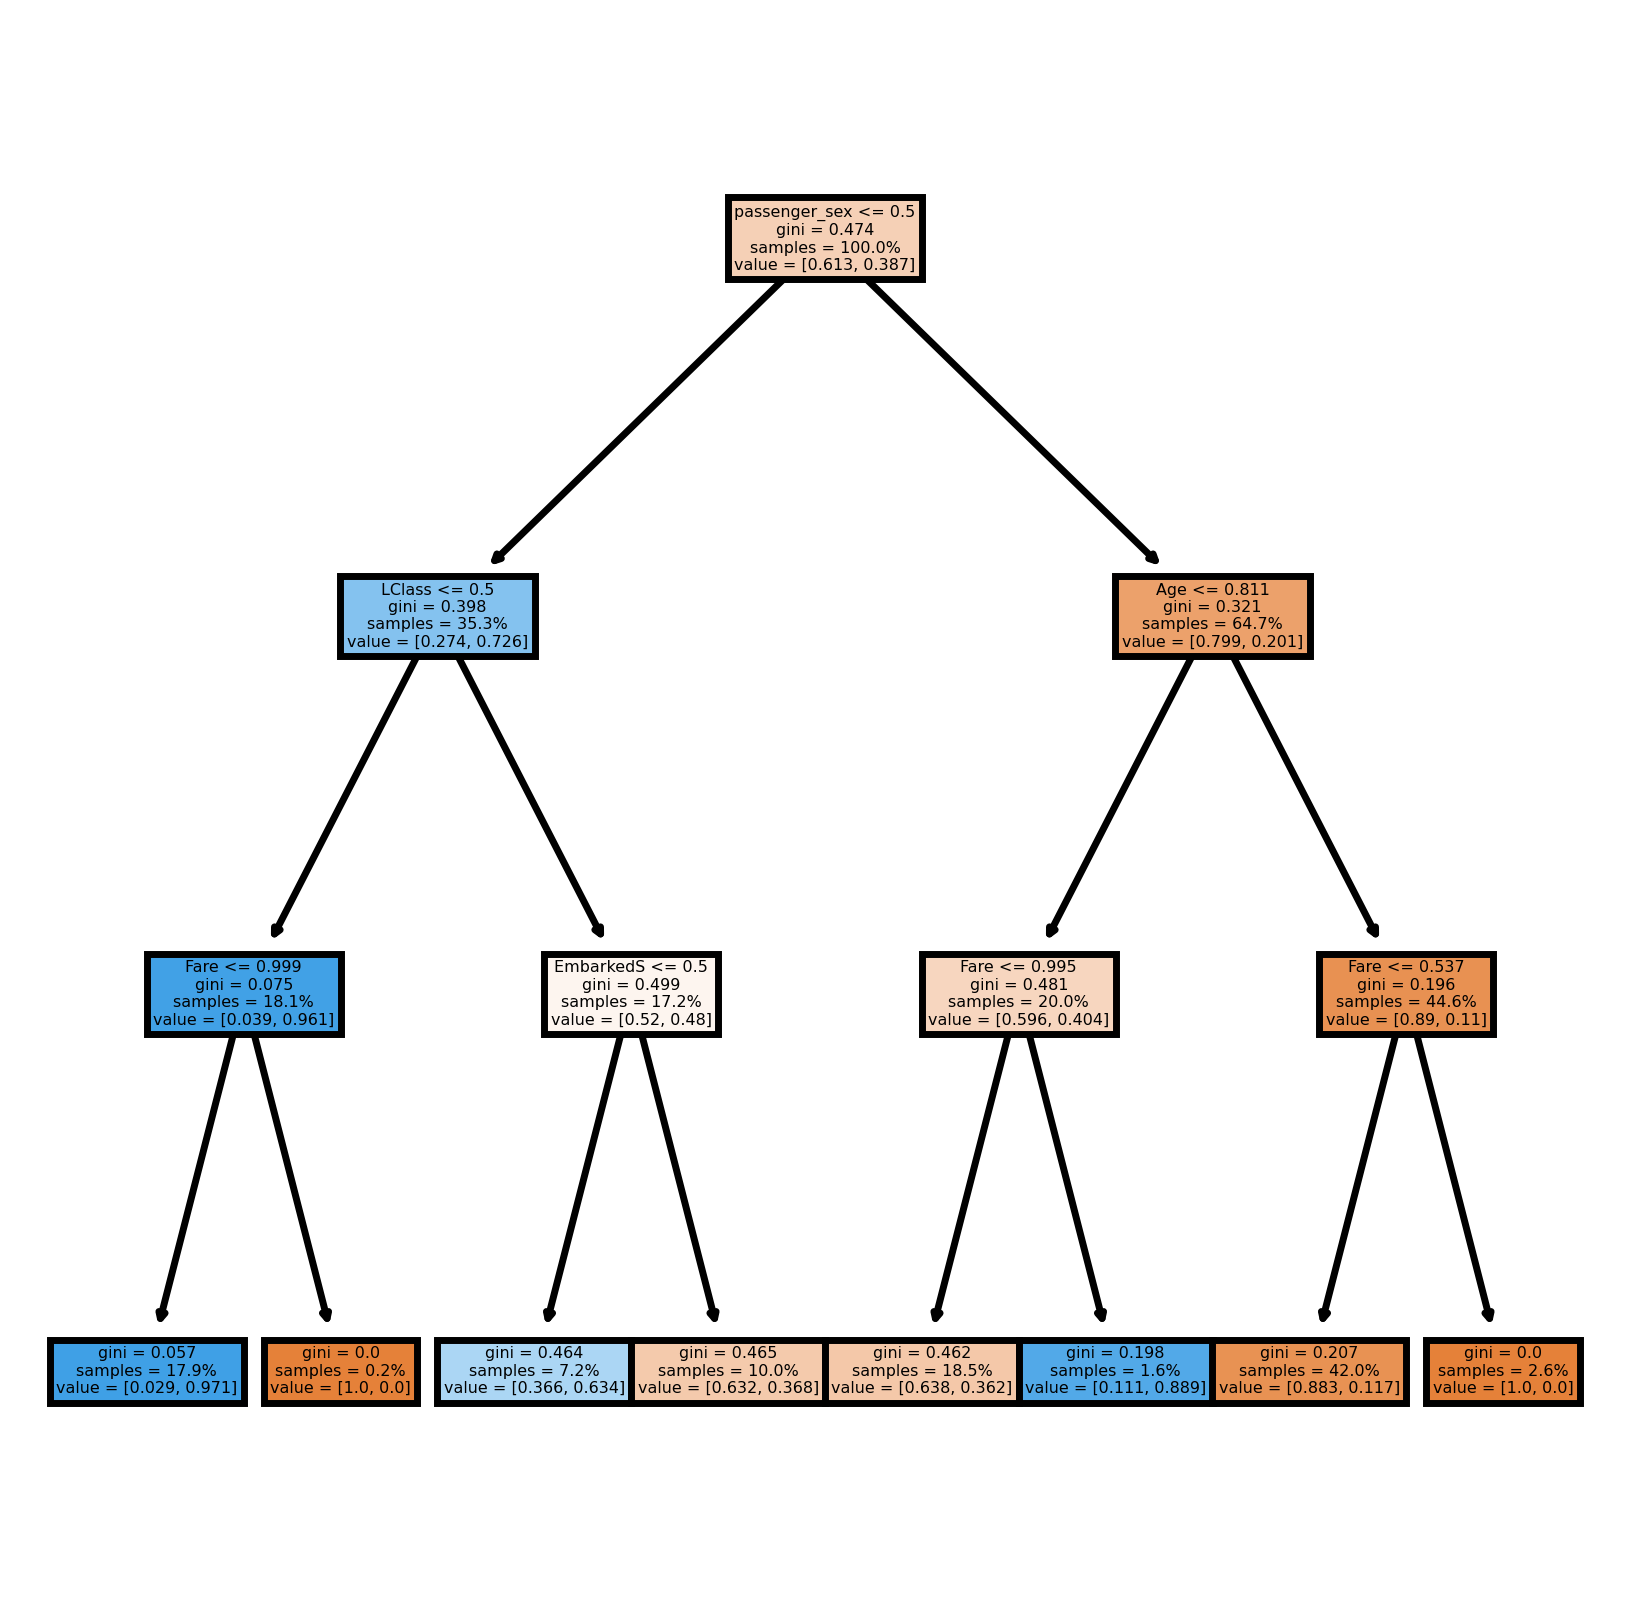

In [17]:
predecir(160)

---------Resumen de resultados--------------
Valor real: survived
Predicción: survived
Probabilida (Regresión Logística): 0.5980930452201437
Probabilidad Naive Bayes 0: 6.278099692710635e-06
Probabilidad Naive Bayes 0: 2.818566656018733e-05
Árbol de decisiones (Grafo)


1

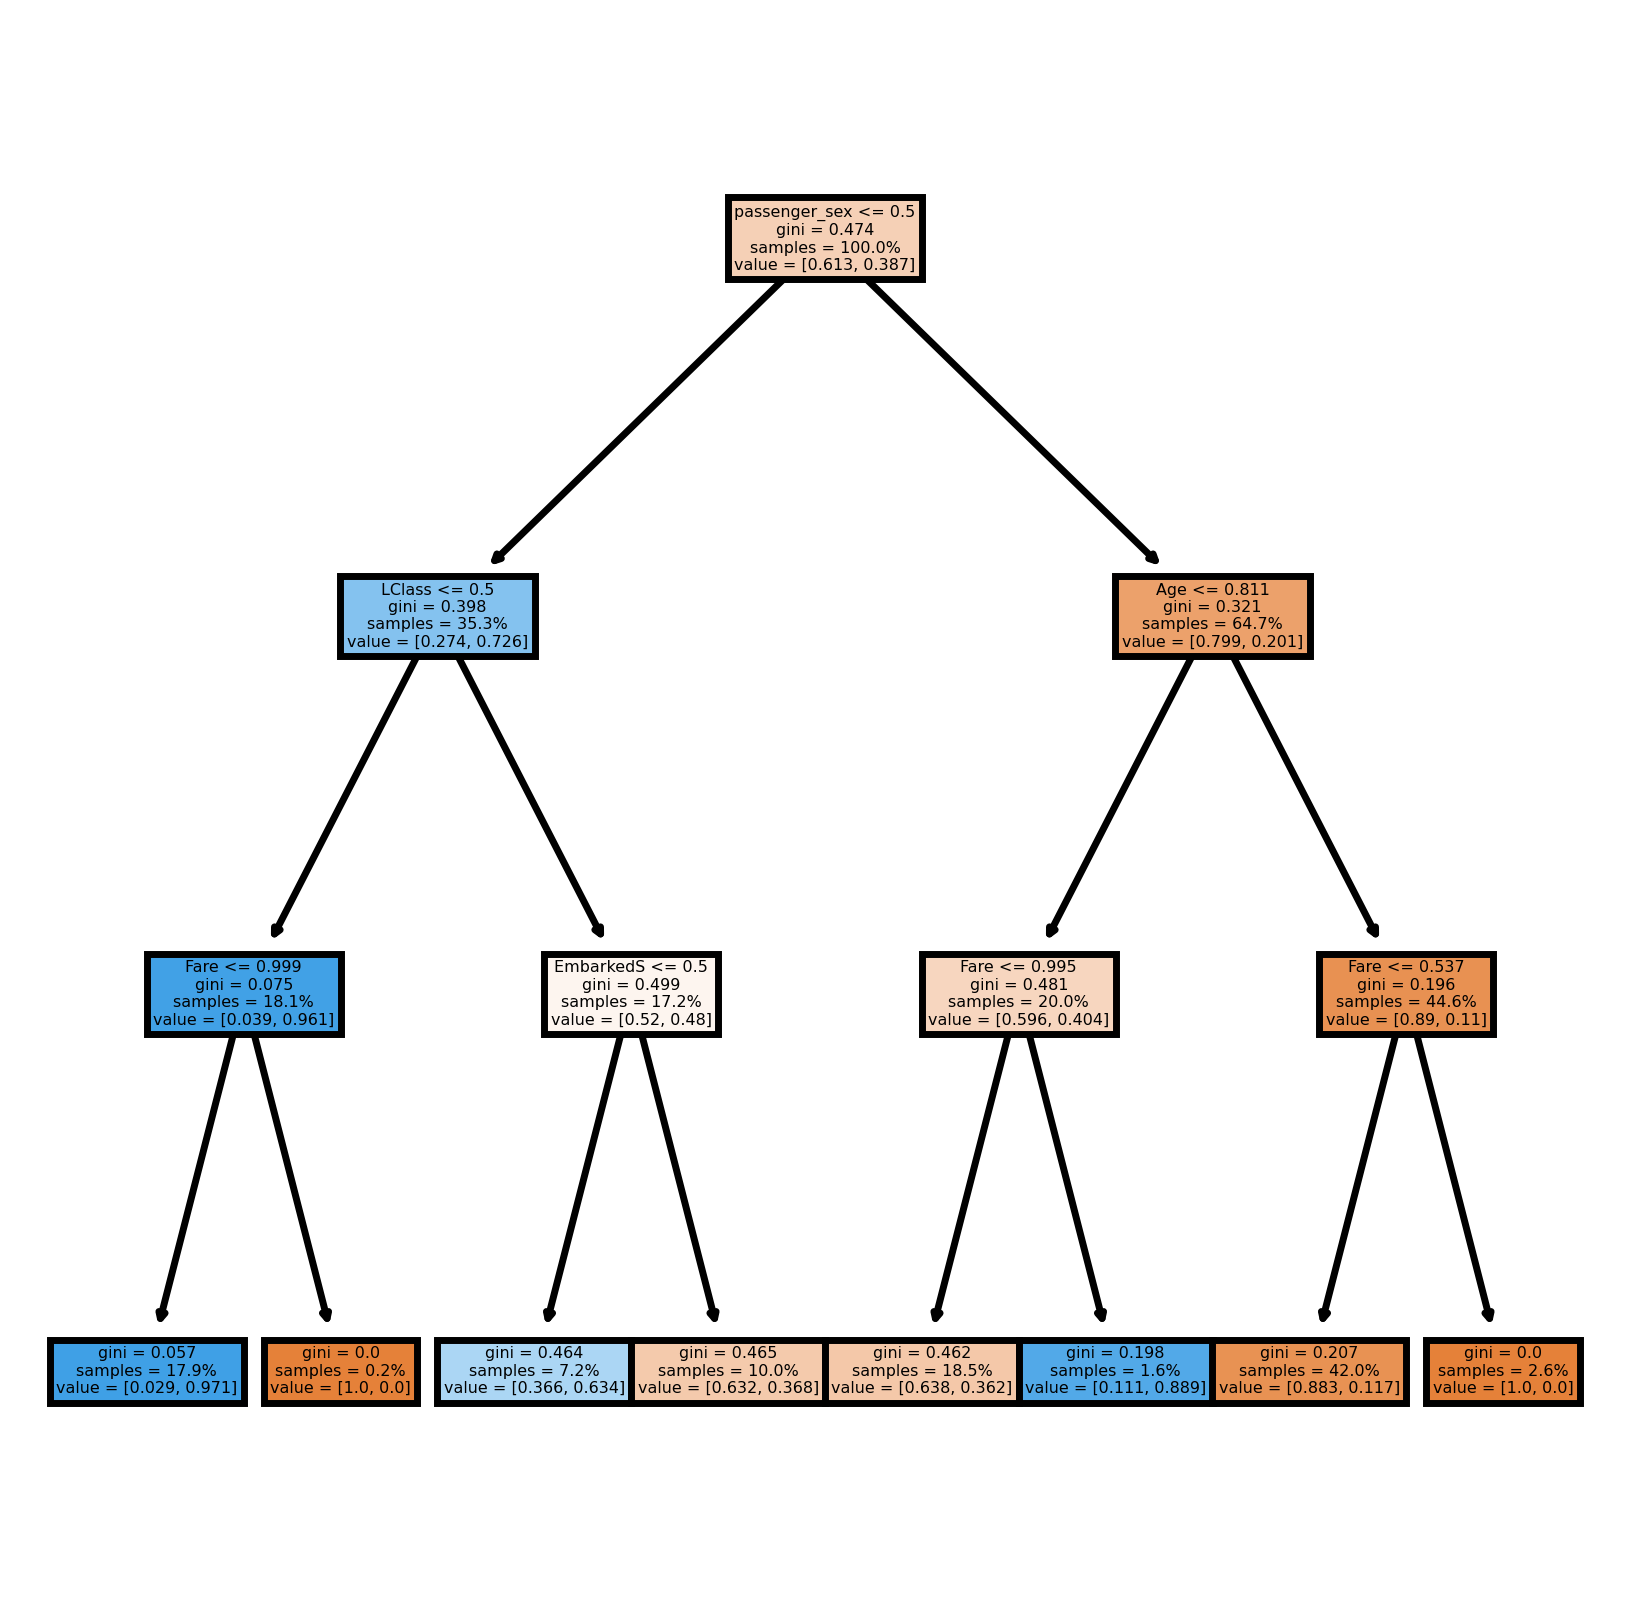

In [19]:
predecir(170)